In [1]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

/Users/abkuma/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
encoding_dim = 64

In [3]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

# Load mnist dataset

In [6]:
(x_train, _),(x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


# Fit data

In [7]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
               validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3473 - val_loss: 0.2671
Epoch 2/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2564 - val_loss: 0.2418
Epoch 3/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.2305 - val_loss: 0.2178
Epoch 4/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.2105 - val_loss: 0.2013
Epoch 5/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1965 - val_loss: 0.1893
Epoch 6/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.1862 - val_loss: 0.1803
Epoch 7/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.1778 - val_loss: 0.1725
Epoch 8/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.1705 - val_loss: 0.1660
Epoch 9/50
60000/60000 [==============================] - 3s 4

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

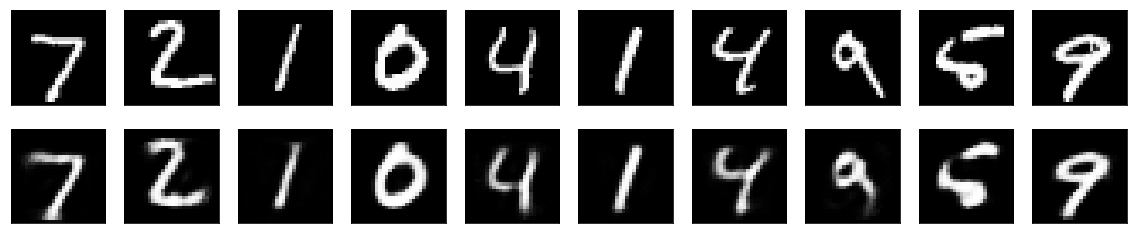

In [9]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()